# MLP With TensorFlow

https://github.com/krother/machine_learning/tree/main/deep_learning/tensorflow

In [1]:
# uv run jupyter notebook

In [42]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow import keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

## Goal
Recognize the type of clothing from a 28 by 28 pixel image

In [3]:
LABELS = "t-shirt,trouser,pullover,dress,coat,sandal,shirt,sneaker,bag,boot".split()

## Get Data

In [4]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
(Xtrain, ytrain), (Xtest, ytest) = load_data()

In [5]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

([], [])

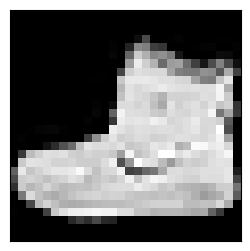

In [6]:
plt.figure(figsize=(3, 3))
plt.imshow(Xtrain[0], cmap="gray")
plt.xticks([])
plt.yticks([])

### Preprocessing

In [7]:
xmin = Xtrain.min()
xmax = Xtrain.max()
xmin, xmax

(np.uint8(0), np.uint8(255))

In [8]:
# min-max scaling
Xtrain_scaled = (Xtrain - xmin) / (xmax - xmin)
Xtrain_scaled.max(), Xtrain_scaled.min(), Xtrain_scaled.dtype

(np.float64(1.0), np.float64(0.0), dtype('float64'))

In [71]:
# scale the test data
Xtest_scaled = (Xtest - xmin) / (xmax - xmin)
Xt = Xtest_scaled.reshape((10000, 28, 28, 1))
yt = k.utils.to_categorical(ytest)

In [46]:
Xtrain_scaled.shape
# X = Xtrain_scaled.reshape((60000, 28*28))  # for MLP
X = Xtrain_scaled.reshape((60000, 28, 28, 1))  # for CNN
X = X[:]  # first 1000 images only

In [19]:
ytrain[:3]

array([9, 0, 0], dtype=uint8)

In [10]:
y = k.utils.to_categorical(ytrain[:])
y[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## What the model is training against:

$$parameter-mod. = learningrate \cdot \nabla loss + \lambda \cdot params^n$$

### Define and train model

In [ ]:
from tensorflow.keras import regularizers

m = Sequential([
    k.Input(shape=(28, 28, 1)),
    Conv2D(filters=10, kernel_size=(3, 3), activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=10, activation="softmax"),  # output layer, softmax: normalizes output to sum(y) = 1.0
])
m.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [57]:
m.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                 │ (None, 26, 26, 10)       │           100 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)    │ (None, 13, 13, 10)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)                 │ (None, 11, 11, 10)       │           910 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)    │ (None, 5, 5, 10)         │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ flatten_4 (Flatten)               │ (None, 250)              │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_43 (Dense)                  │ (None, 10)               │         2,510 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 3,520 (13.75 KB)

 Trainable params: 3,520 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras import regularizers

m = Sequential([
    k.Input(shape=(784,)),
    Dense(units=50, activation="sigmoid", 
          kernel_regularizer=regularizers.L2(0.1),
         ),   # alternative: "relu", "leaky_relu" ? 
    Dense(units=50, activation="sigmoid"),
    Dropout(0.5),
    Dense(units=50, activation="sigmoid"),
    Dropout(0.5),
    Dense(units=50, activation="sigmoid"),
    Dense(units=10, activation="softmax"),  # output layer, softmax: normalizes output to sum(y) = 1.0
])
m.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [29]:
m.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                  │ (None, 50)               │        39,250 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_33 (Dense)                  │ (None, 50)               │         2,550 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout_8 (Dropout)               │ (None, 50)               │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_34 (Dense)                  │ (None, 50)               │         2,550 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout_9 (Dropout)               │ (None, 50)               │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_35 (Dense)                  │ (None, 50)               │         2,550 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_36 (Dense)                  │ (None, 10)               │           510 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 47,410 (185.20 KB)

 Trainable params: 47,410 (185.20 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
callback = EarlyStopping(monitor='val_loss', patience=3)
#history = m.fit(X, y, callbacks=[callback], batch_size=200, epochs=50, validation_split=0.2, verbose=True)
history = m.fit(X, y, batch_size=200, epochs=50, validation_split=0.2, verbose=True)

Epoch 1/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4928 - loss: 1.5283 - val_accuracy: 0.7632 - val_loss: 0.6233
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7866 - loss: 0.5838 - val_accuracy: 0.8072 - val_loss: 0.5188
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8156 - loss: 0.4998 - val_accuracy: 0.8232 - val_loss: 0.4792
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8331 - loss: 0.4637 - val_accuracy: 0.8393 - val_loss: 0.4475
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8461 - loss: 0.4310 - val_accuracy: 0.8474 - val_loss: 0.4373
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8465 - loss: 0.4250 - val_accuracy: 0.8512 - val_loss: 0.4172
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8539 - loss: 0.4089 - val_accuracy: 0.8553 - val_loss: 0.4065
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8583 - loss: 0.3971 - val_accuracy: 0.

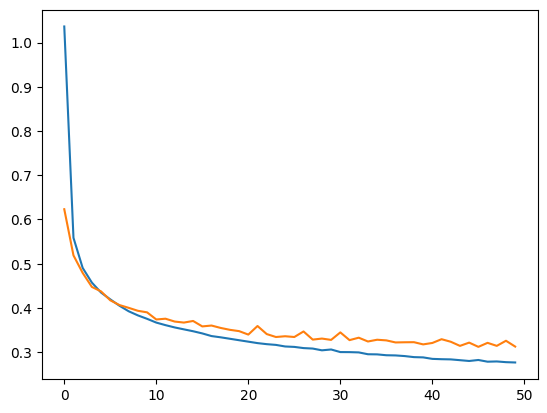

In [59]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

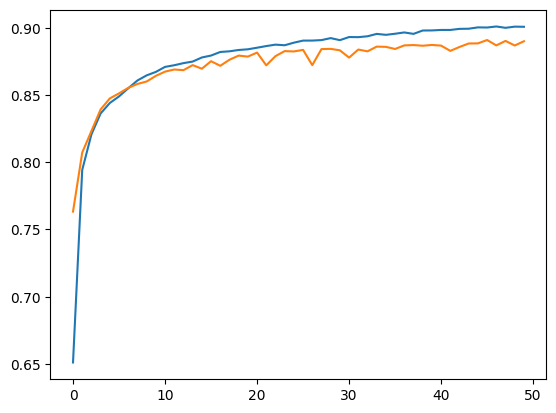

In [60]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

['t-shirt,trouser,pullover,dress,coat,sandal,shirt,sneaker,bag,boot']

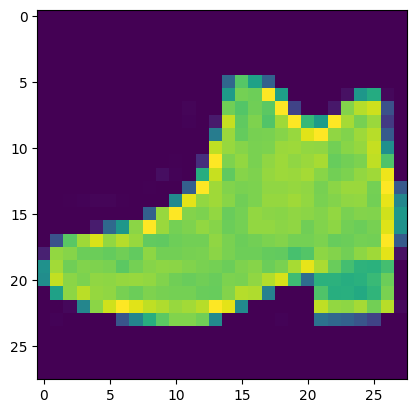

In [63]:
a = X[15]
plt.imshow(a.reshape((28, 28)))
LABELS

In [69]:
a = a.reshape((1, 28, 28, 1))
ypred = m.predict(a)
ypred.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [72]:
ypred_test = m.predict(Xt)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [80]:
# calculate how many predictions were wrong
import numpy as np

np.abs(ypred_test.round() - yt).sum() / 2 # should be 0 if everything is predicted correctly, otherwise 2

np.float64(1119.5)